Traffic Analysis Visualizations 

In [33]:
"""
This cell will contain the import statements for the notebook.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# read csv file for traffic
df1 = pd.read_csv("Traffic.csv")

In [24]:
#brief look at the data
df1.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
# look at object types for dataset df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [26]:
#check for duplicated and missing values
df1.duplicated().sum()

np.int64(0)

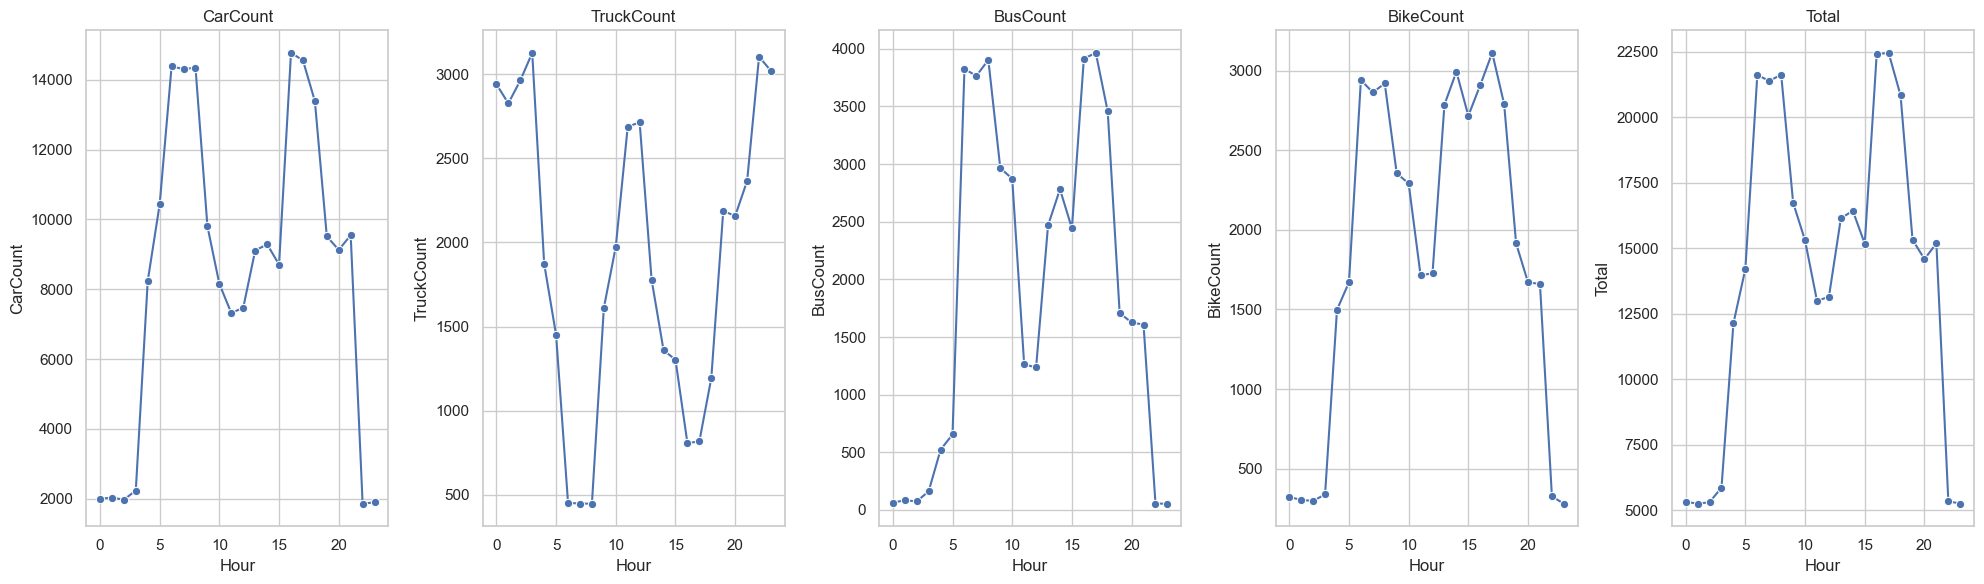

In [27]:
#Dataset visualization for hourly vehicle counts
df1['Hour'] = pd.to_datetime(df["Time"], format="%I:%M:%S %p").dt.hour

vehicle_columns = ["CarCount", "TruckCount", "BusCount", "BikeCount", "Total"]
hourly_vehicle_counts = df1.groupby("Hour")[vehicle_columns].sum()

fig, ax = plt.subplots(1, 5, figsize=(20, 6))

#create line plots for each vehicle type
for i, column in enumerate(vehicle_columns):
    sns.lineplot(data=hourly_vehicle_counts, x="Hour", y=column, ax=ax[i], marker="o")
    ax[i].set_title(column)
    
plt.tight_layout()
plt.show()

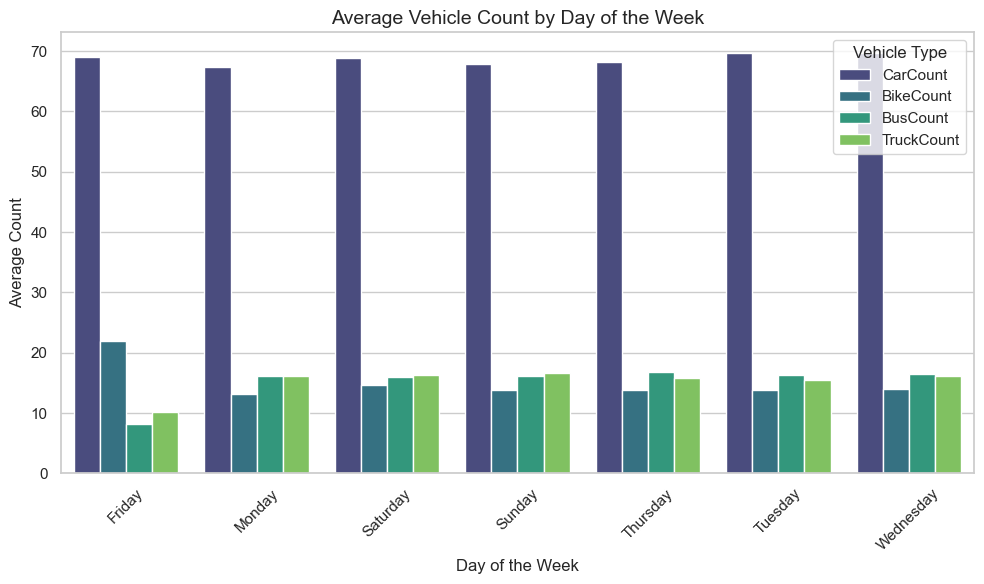

In [28]:
#show the average vehicle count by day of the week
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']


grouped_df = df1.groupby('Day of the week')[numeric_columns].mean()


grouped_df = grouped_df.reset_index()

grouped_df_melted = pd.melt(grouped_df, id_vars='Day of the week', var_name='Vehicle Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


sns.barplot(x='Day of the week', y='Count', hue='Vehicle Type', data=grouped_df_melted, palette='viridis')


plt.xticks(rotation=45)


plt.title('Average Vehicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Count', fontsize=12)


plt.tight_layout()
plt.show()

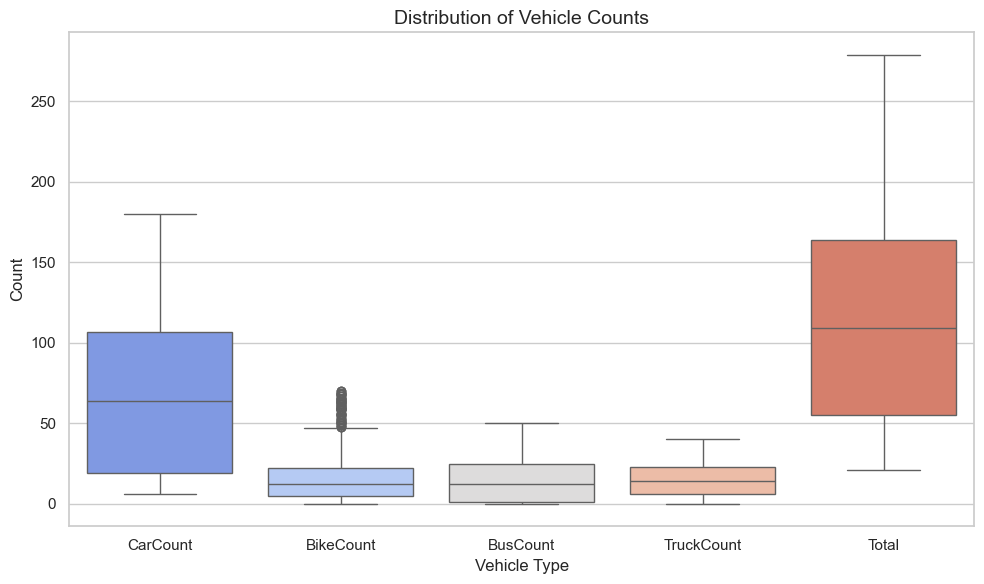

In [29]:
#distribution of vehicle counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']], palette='coolwarm')

plt.title('Distribution of Vehicle Counts', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Traffic Analysis Visualizations for the Two Month Dataset

In [21]:
# read two month traffic analysis .csv file 
df2 = pd.read_csv("TrafficTwoMonth.csv")

In [36]:
# view part of the dataset
print(df2.head())
print(df2["Traffic Situation"].value_counts())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  Hour  
0          24     41            normal     0  
1          36     52            normal     0  
2          32     46            normal     0  
3          36     50            normal     0  
4          34     48            normal     1  
Traffic Situation
normal    3610
heavy     1137
low        834
high       371
Name: count, dtype: int64


In [31]:
# look at object types for dataset df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [32]:
#check for duplicated and missing values
df1.duplicated().sum()

np.int64(0)

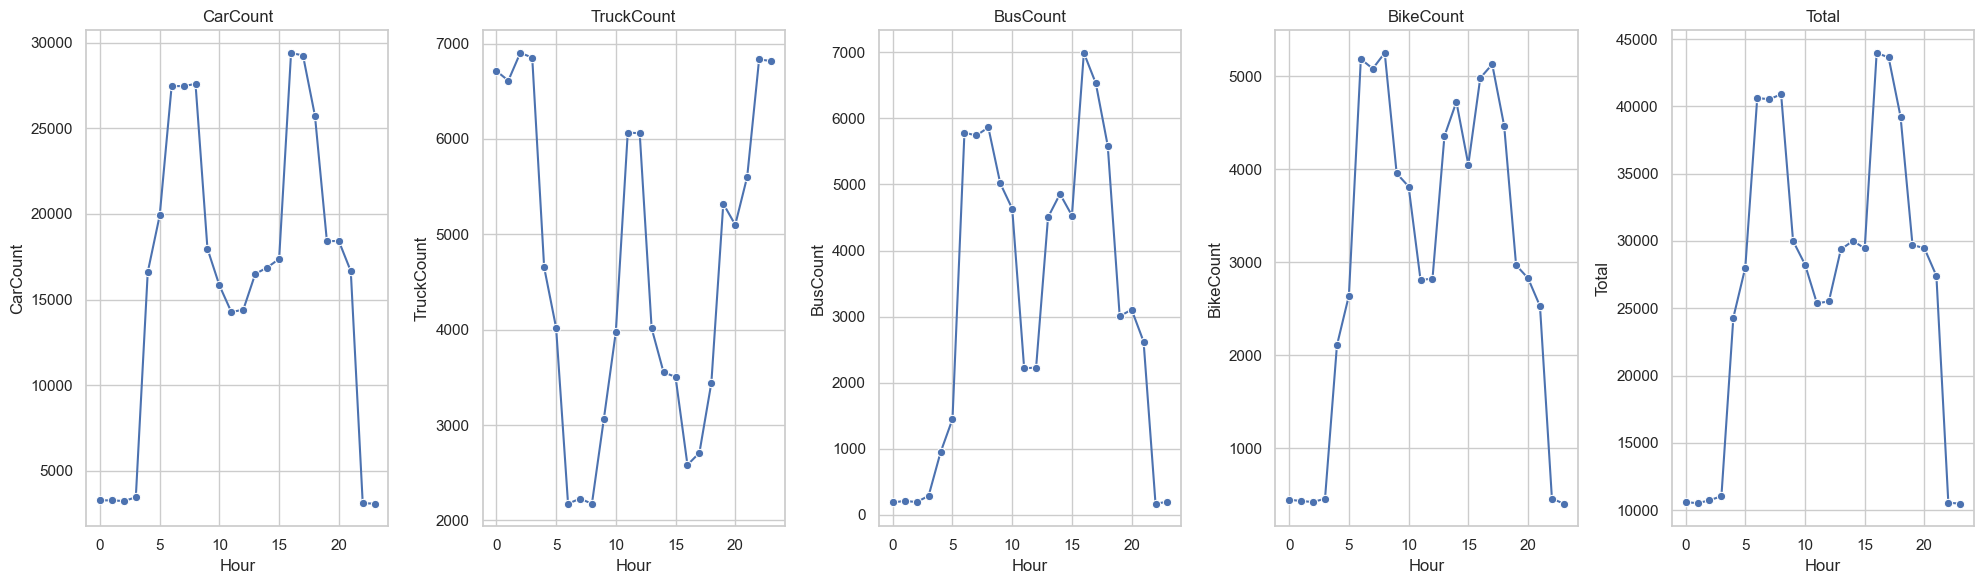

In [37]:
#Dataset visualization for hourly vehicle counts
df2['Hour'] = pd.to_datetime(df2["Time"], format="%I:%M:%S %p").dt.hour

vehicle_columns = ["CarCount", "TruckCount", "BusCount", "BikeCount", "Total"]
hourly_vehicle_counts = df2.groupby("Hour")[vehicle_columns].sum()

fig, ax = plt.subplots(1, 5, figsize=(20, 6))

#create line plots for each vehicle type
for i, column in enumerate(vehicle_columns):
    sns.lineplot(data=hourly_vehicle_counts, x="Hour", y=column, ax=ax[i], marker="o")
    ax[i].set_title(column)
    
plt.tight_layout()
plt.show()

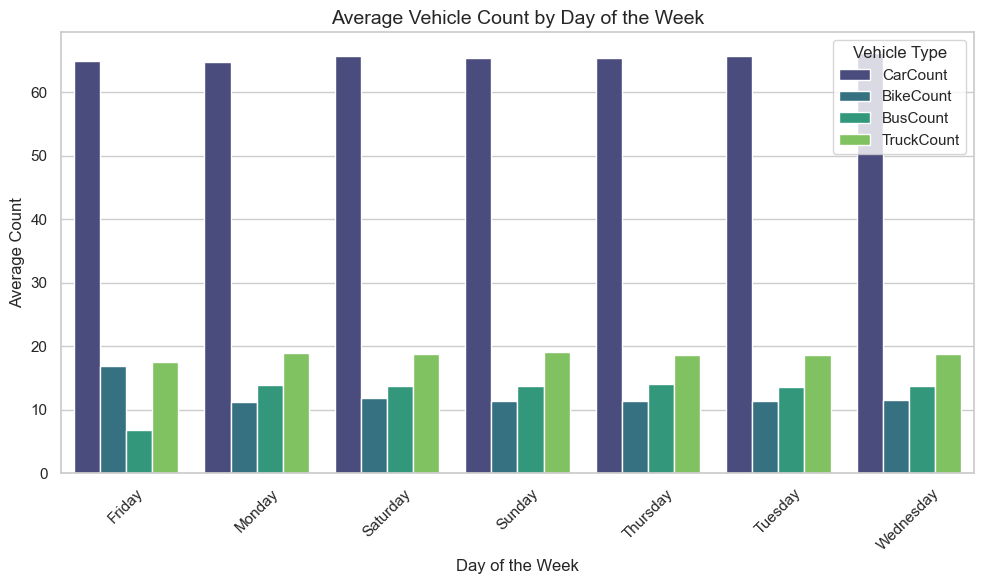

In [38]:
#show the average vehicle count by day of the week
numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']


grouped_df2 = df2.groupby('Day of the week')[numeric_columns].mean()


grouped_df2 = grouped_df2.reset_index()

grouped_df2_melted = pd.melt(grouped_df2, id_vars='Day of the week', var_name='Vehicle Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


sns.barplot(x='Day of the week', y='Count', hue='Vehicle Type', data=grouped_df2_melted, palette='viridis')


plt.xticks(rotation=45)


plt.title('Average Vehicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Count', fontsize=12)


plt.tight_layout()
plt.show()

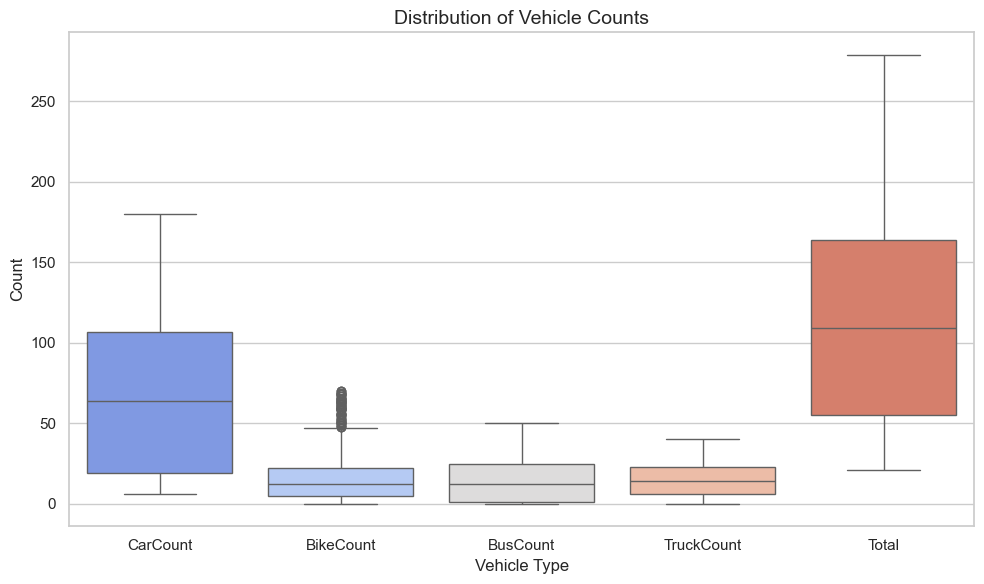

In [39]:
#distribution of vehicle counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']], palette='coolwarm')

plt.title('Distribution of Vehicle Counts', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()